# Maximum Likelihood
**FIZ371 - Scientific & Technical Calculations | 15/03/2021**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

**The Problem** Given a sample of $\{x_n\}_{n=1}^{N}$ what is the probability that it has been sampled from a distribution, say a Gaussian one with $(\mu,\sigma)$?

Gaussian Probability Distribution Function:

$$P(x|\mu,\sigma) =  \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)^2/2\sigma^2}$$

so the probability that we'll pick the exact sample using this distribution is the multiplication of all the individual picking probabilities. But since these are very small quantities, instead of working with the products of them, let's work with the _logarithm_ of the product of them (this is legit because if $a>b\rightarrow \log a > \log b$:

$$\begin{align}\log{P({\{x_n\}|\mu,\sigma})}&=\log\left[P(x=x_1|\mu,\sigma).P(x=x_2|\mu,\sigma)\dots P(x=x_N|\mu,\sigma)\right] \\&= \log\left[\prod_{n=1}^{N}{P(x=x_n|\mu,\sigma)}\right]\\
&=\log\left[\prod_{n=1}^{N}{\frac{1}{\sqrt{2\pi}\sigma} e^{-(x_n-\mu)^2/2\sigma^2}}\right]\\
&=\sum_{n=1}^{N}\left[\log{\left(\frac{1}{\sqrt{2\pi}\sigma} e^{-(x_n-\mu)^2/2\sigma^2}\right)}\right]\\
&=\sum_{n=1}^{N}{\left[\log{\left(\frac{1}{\sqrt{2\pi}\sigma}\right)}+\log{\left( e^{-(x_n-\mu)^2/2\sigma^2}\right)}\right]}\\
&=\sum_{n=1}^{N}{\log{\left(\frac{1}{\sqrt{2\pi}\sigma}\right)}}+\sum_{n=1}^{N}{\log{\left( e^{-(x_n-\mu)^2/2\sigma^2}\right)}}\\
&=-N\log\left(\sqrt{2\pi}\sigma\right)-\sum_{n=1}^{N}{\frac{(x_n-\mu)^2}{2\sigma^2}}
\end{align}$$

If we define the _average_ $\bar{x}$ and _sum of square deviations_ $S$ as:

$$\bar{x}\equiv\sum_{n=1}^{N}{\frac{x_n}{N}}$$

and

$$S \equiv \sum_{n=1}^{N}{(x_n - \bar{x})^2}$$

then the above equation for the $\log{P({\{x_n\}|\mu,\sigma})}$ can be written in terms of these $\bar{x}$ and $S$ as:

$$\log P(\{x\}|\mu,\sigma) = - N \log (\sqrt{2\pi\sigma^2}) -\frac{[N(\mu - \overline{x})^2 + S]}{ 2\sigma^2}$$

### Proof
To prove that:

$$-N\log\left(\sqrt{2\pi}\sigma\right)-\sum_{n=1}^{N}{\frac{(x_n-\mu)^2}{2\sigma^2}}=- N \log (\sqrt{2\pi\sigma^2}) -\frac{[N(\mu - \overline{x})^2 + S]}{ 2\sigma^2}$$

we only need to show that:
$$\sum_{n=1}^{N}{(x_n-\mu)^2} = [N(\mu - \overline{x})^2 + S]$$

$$\begin{align*}
\sum_{n=1}^{N}{x_n^2}-\underbrace{2\mu\sum{x_n}}_{2N\mu\bar x}+N\mu^2 &\stackrel{?}{=} N\mu^2-2N\mu\bar x+N\bar{x}^2+\sum{(x_n-\bar x)^2}\\
\sum_{n=1}^{N}{x_n^2}&\stackrel{?}{=} N\bar{x}^2+\sum{x_n^2}+-2\bar{x}\underbrace{\sum{x_n}}_{N\bar{x}}+N\bar{x}^2\\
\sum_{n=1}^{N}{x_n^2}&=\sum_{n=1}^{N}{x_n^2}
\end{align*}$$

## Maximizing the Likelihood (_Doctorin' the Tardis_ 8)

$$\log P(\{x\}|\mu,\sigma) = - N \log (\sqrt{2\pi\sigma^2}) -\frac{[N(\mu - \overline{x})^2 + S]}{ 2\sigma^2}$$

The most optimal $\mu$ and $\sigma$ values would be the ones that maximizes the probability. So we differentiate the $\log P$ equation wrt $\mu$ and $\sigma$:

$$\frac{\partial}{\partial\mu}\log P = -\frac{N(\mu-\bar x)}{\sigma^2} = 0\\
\mu = \bar x$$

When we are looking for the optimal $\sigma$, choosing to differentiate with respect to $\log\sigma$ would be more convenient so we can use the differentiation relation:

$$\frac{\text{d}u^n}{\text{d}(\log u)} = n u^n$$

$$\frac{\partial}{\partial\log\sigma}\log P = -N+\frac{S}{\sigma^2} = 0\\
\sigma^2 = \frac{S}{N}\Rightarrow \sigma = \sqrt{\frac{\sum{(x_n - \mu)^2}}{N}}$$

# Application
Let's pull a random sample of $N$ data from a Gaussian distibution with $(\mu,\sigma)=(50,20)$:

In [14]:
import numpy as np

# Sample the data using "hidden" mu & sigma
mu_hidden = 50
sigma_hidden = 20
N = 10000

data = np.round(np.random.normal(mu_hidden,sigma_hidden,N))

In [2]:
# Calculate the frequencies, hence probabilities
freq = {}
for x in np.arange(np.min(data),np.max(data)+1):
    freq[x] = np.sum(data == x) / N

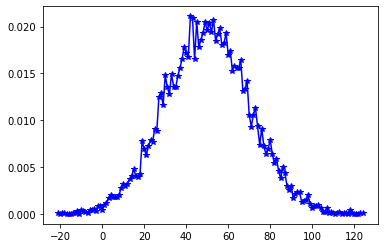

In [3]:
# Plot the data
import matplotlib.pyplot as plt

plt.plot(freq.keys(),freq.values(),"b*-")
plt.show()

In [10]:
mu_opt = np.mean(data)
sigma_opt = 0
for x in data:
    sigma_opt += (x - mu_opt)**2
sigma_opt /= N
sigma_opt = np.sqrt(sigma_opt)

print("mu_opt: {:.3f}, sigma_opt: {:.3f}".format(mu_opt,sigma_opt))

mu_opt: 49.980, sigma_opt: 20.034


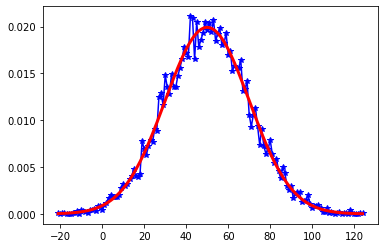

In [5]:
import scipy.stats as spstats
y = spstats.norm.pdf(list(freq.keys()),mu_opt,sigma_opt)
plt.plot(freq.keys(),freq.values(),"b*-")
plt.plot(freq.keys(),y,"r-",linewidth=3)
plt.show()